<a href="https://colab.research.google.com/github/tanujsaini05/GDSC_AI-ML_workshop/blob/main/creditCardANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dt=pd.read_csv('creditcard.csv')

In [ ]:
dt.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt

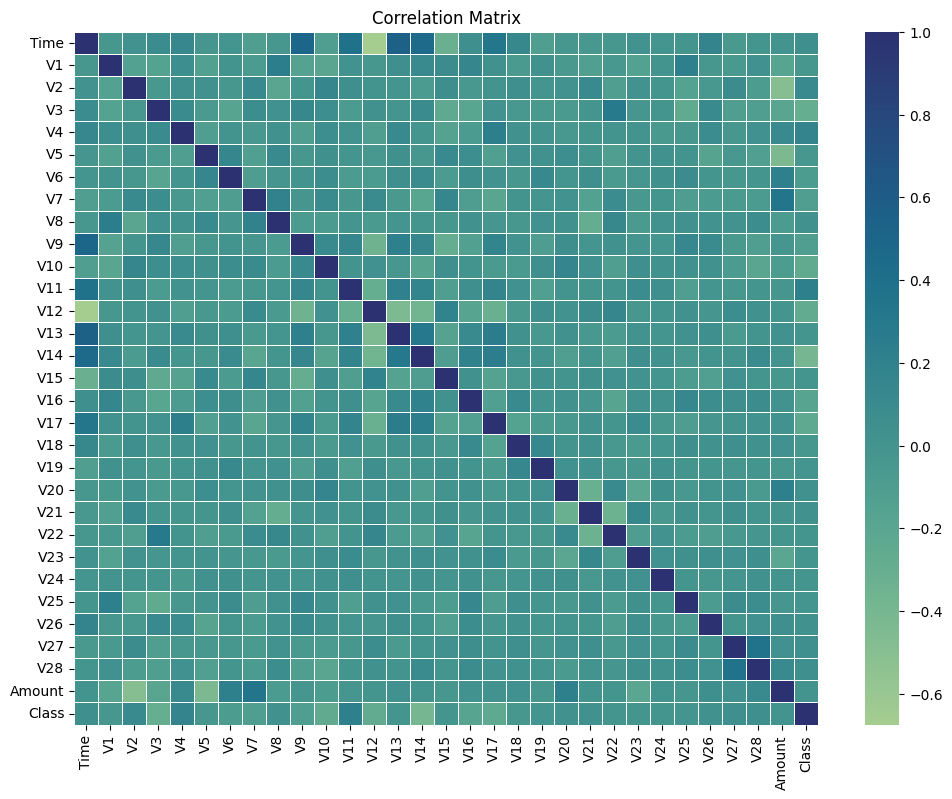

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(dt.corr(),linewidth=.5,cmap="crest")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
dt.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
dt=dt.dropna()

In [ ]:
dt.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
X,y=dt.iloc[:,:-1],dt.iloc[:,-1]

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,10980,-0.046786,0.030050,2.037794,-0.670130,-0.727283,-0.588537,-0.067966,-0.370767,0.228931,...,0.322583,0.264364,1.078896,-0.097768,0.375679,-0.500253,-0.159051,-0.018267,-0.061794,39.00
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.063281,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.150267,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.001388,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95


In [ ]:
y.value_counts()

0.0    7947
1.0      25
Name: Class, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler(random_state=42)
X_res,y_res=ros.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=34)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
X_train=ss.fit_transform(X_train)

In [ ]:
#X_train=mms.fit_transform(X_train)
#y_train=mms.fit_transform(y_train)

In [ ]:
X_train

array([[-1.223303  , -2.59216051, -3.65823866, ..., -0.30638605,
         0.75333963, -0.35818142],
       [ 0.52630567, -1.74383906, -2.20273992, ...,  1.0570363 ,
        -0.34631634,  0.51344581],
       [ 0.98276607, -0.1785288 ,  0.80235499, ...,  0.04046451,
         0.31032431, -0.36106703],
       ...,
       [-0.66998926, -0.21920757,  0.43171514, ...,  0.90715678,
         0.16597708, -0.36683825],
       [ 0.25511633,  0.87092383, -0.8675303 , ...,  0.10447966,
         0.12895012,  0.14391465],
       [-0.39317617,  1.07458989, -0.25305754, ..., -0.12942691,
         0.04027444, -0.36118245]])

In [ ]:
X_train.shape

(5580, 30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Build and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.9991638795986622

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2384
         1.0       0.88      0.88      0.88         8

    accuracy                           1.00      2392
   macro avg       0.94      0.94      0.94      2392
weighted avg       1.00      1.00      1.00      2392



In [ ]:
# Starting neural Network

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.Sequential()

In [ ]:
from tensorflow.keras import activations

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(40, activation="relu", input_dim=30))
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                1240      
                                                                 
 dense_5 (Dense)             (None, 70)                2870      
                                                                 
 dense_6 (Dense)             (None, 50)                3550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7711 (30.12 KB)
Trainable params: 7711 (30.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_1=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,callbacks=early_stop,batch_size=32)

Epoch 1/20
175/175 [==============================] - 3s 8ms/step - loss: 0.0988 - accuracy: 0.9731 - val_loss: 25.9441 - val_accuracy: 0.9967
Epoch 2/20
175/175 [==============================] - 1s 4ms/step - loss: 0.0123 - accuracy: 0.9970 - val_loss: 24.3331 - val_accuracy: 0.9967
Epoch 3/20
175/175 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9977 - val_loss: 31.8329 - val_accuracy: 0.9967
Epoch 4/20
175/175 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 33.0988 - val_accuracy: 0.9967
Epoch 5/20
175/175 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 35.4525 - val_accuracy: 0.9967
Epoch 6/20
175/175 [==============================] - 1s 3ms/step - loss: 8.4582e-04 - accuracy: 0.9996 - val_loss: 37.1927 - val_accuracy: 0.9967
Epoch 7/20
175/175 [==============================] - 0s 3ms/step - loss: 4.2445e-04 - accuracy: 0.9998 - val_loss: 39.7489 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

75/75 [==============================] - 0s 2ms/step - loss: 39.7489 - accuracy: 0.9967


In [ ]:
print(loss,"   ",accuracy)

39.748924255371094     0.9966555237770081


In [ ]:
X_train[1,:]

array([ 1.27601202,  0.84205971, -0.78719325,  0.27114709,  0.0914432 ,
       -1.15225119, -0.17499303, -0.75595877,  0.21606328,  1.26932758,
       -0.6264684 , -0.32966841,  1.15083945,  0.58754543, -0.46732349,
       -0.40400292, -0.43372151,  0.76631506, -1.33749671, -0.07386242,
        0.13385722, -0.1880557 , -0.21485977,  0.257486  ,  0.83145499,
       -0.26054154,  1.88262455, -0.13590794,  0.19690083,  0.24717852])

In [ ]:
model.predict([[ 1.27601202,  0.84205971, -0.78719325,  0.27114709,  0.0914432 ,-1.15225119, -0.17499303, -0.75595877,  0.21606328,  1.26932758,-0.6264684 , -0.32966841,  1.15083945,  0.58754543, -0.46732349,-0.40400292, -0.43372151,  0.76631506, -1.33749671, -0.07386242,0.13385722, -0.1880557 , -0.21485977,0.257486,  0.83145499,-0.26054154,  1.88262455, -0.13590794,  0.19690083,  0.24717852]])

1/1 [==============================] - 0s 111ms/step


array([[0.00028154]], dtype=float32)

In [ ]:
prediction=model.predict([[ 5.32000000e+02, -2.08126385e+00,  1.68255833e+00,  6.51263800e-01,-5.33548658e-01,  4.40529215e-01, -1.13732360e-01,  8.75113877e-01,-1.49852238e-01,  1.07760307e+00,  2.23030122e+00,  1.72446870e+00,3.11639406e-01, -2.52562578e-01, -1.10190255e+00,  7.06008442e-01,1.21038721e-01, -3.56188625e-01, -1.25557801e-01, -2.03581005e-01,9.37684099e-01, -5.98398393e-01, -6.25481591e-01,  1.00454588e-01,-3.89908592e-01,  1.33481255e-01,  9.05847152e-02,  6.57235700e-01,2.31941417e-01,  1.79900000e+01]])

1/1 [==============================] - 0s 37ms/step


In [ ]:
print(prediction)

[[0.]]
